In [65]:
! pip install Pillow

  Using cached pillow-11.1.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)


In [74]:
import os, io, json, tarfile
import pandas as pd
from fastparquet import ParquetFile
from PIL import Image
import IPython.display as display


# Inspecting total metadata

In [78]:
metadata_path = "/home/leobaro/Downloads/datasets/web/datacomp/_metadata_1"

In [6]:
df = pd.read_parquet(metadata_path)
display(df.head())  # Show first few rows

,uid,url,text,original_width,original_height,clip_b32_similarity_score,clip_l14_similarity_score,face_bboxes,sha256
0,3965dcad12d51a3fc67adfbe4ed2d6bc,https://tse3.mm.bing.net/th?id=OIP.gz02TRFWaLX...,l shaped kitchens with island l shaped kitchen...,474,316,0.284912,0.251709,None,3860417a33bd790ef5f197f7701137efcff4feadc9f0ad...
1,4f42e5fd6e85a45b05714b85cd4d377d,http://i2.wp.com/the-pled.ru/wp-content/upload...,В поисках себя: интервью с Еленой eelesku,378,378,0.176025,0.145020,None,4dd49338d4b29a1ecbba41ccbf738e225353c6c9a76060...
2,7e69a66689f697d961c18f085af23d8c,https://us.123rf.com/450wm/sergeybitos/sergeyb...,Digital design elements in 80s-90s. Retro Futu...,450,199,0.265381,0.245728,None,955f8531f050e39f13f8d0e1e212188869be52245e801b...
3,4bc6c2b72aa3329e55f1b691b235623b,https://img0.etsystatic.com/070/1/9313313/il_7...,"Flower Industrial Barbell, Looped Industrial B...",75,75,0.305176,0.237793,None,28c05574d415eca84b49bfeab50a1329d461b52065914e...
4,702d1e6759ce0a680a309bb85238960d,https://imgv2-2-f.scribdassets.com/img/documen...,Tri a Des,149,198,0.199463,0.168213,None,f047eed544b0231deb3d7e293efddceafeb10ec334f70c...


In [9]:
selected_columns = ["original_width", "original_height", "clip_b32_similarity_score", "clip_l14_similarity_score"]
display(df[selected_columns].describe())  # Summary statistics for selected columns

,original_width,original_height,clip_b32_similarity_score,clip_l14_similarity_score
count,507855.000000,507855.000000,507855.000000,507855.000000
mean,434.798767,368.661770,0.253916,0.208207
std,432.064755,391.166371,0.051731,0.064293
min,1.000000,1.000000,0.008942,-0.074585
25%,160.000000,150.000000,0.214844,0.159912
50%,300.000000,267.000000,0.247070,0.203247
75%,600.000000,480.000000,0.290039,0.253906
max,16382.000000,27002.000000,0.513184,0.498291


# Inspecting shard metadata

In [27]:
files = os.listdir("/home/leobaro/Downloads/datasets/web/datacomp/_shards_1")
parquet_files = [f for f in files if f.endswith(".parquet")]
tar_files = [f for f in files if f.endswith(".tar")]

In [34]:
def explore_parquet_metadata(parquet_path):
    parquet_file = ParquetFile(parquet_path)
    metadata = parquet_file.info  # Correct way to access metadata in fastparquet
    schema = parquet_file.schema  # Access schema details
    print("Metadata[name]:", metadata["name"])
    print("Metadata[columns]:", metadata["columns"])
    print("Schema:", schema)

In [33]:
explore_parquet_metadata(os.path.join(shards_dir, parquet_files[0]))

Metadata[name]: /home/leobaro/Downloads/datasets/web/datacomp/_shards_1/00000046.parquet
Metadata[columns]: ['uid', 'face_bboxes', 'caption', 'url', 'key', 'status', 'error_message', 'width', 'height', 'original_width', 'original_height', 'exif', 'sha256']
Schema: - schema: REQUIRED
| - uid: BYTE_ARRAY, STRING, UTF8, OPTIONAL
| - face_bboxes: LIST, LIST, OPTIONAL
|   - list: REPEATED
|     - item: LIST, LIST, OPTIONAL
|       - list: REPEATED
|         - item: DOUBLE, OPTIONAL
| - caption: BYTE_ARRAY, STRING, UTF8, OPTIONAL
| - url: BYTE_ARRAY, STRING, UTF8, OPTIONAL
| - key: BYTE_ARRAY, STRING, UTF8, OPTIONAL
| - status: BYTE_ARRAY, STRING, UTF8, OPTIONAL
| - error_message: BYTE_ARRAY, STRING, UTF8, OPTIONAL
| - width: INT32, OPTIONAL
| - height: INT32, OPTIONAL
| - original_width: INT32, OPTIONAL
| - original_height: INT32, OPTIONAL
| - exif: BYTE_ARRAY, STRING, UTF8, OPTIONAL
  - sha256: BYTE_ARRAY, STRING, UTF8, OPTIONAL


# Inspecting tar content

In [75]:
def extract_and_display_tar_contents(tar_path, filename):
    print(tar_path, filename)
    with tarfile.open(tar_path, "r") as tar:
        contents = tar.getnames()
        
        if filename not in contents:
            raise FileNotFound()
            
        file = tar.extractfile(filename)
        if file:
            if filename.endswith(".jpg"):
                image = Image.open(io.BytesIO(file.read()))
                display.display(image)  # Display image inline in Jupyter
            elif filename.endswith(".json"):
                json_data = json.load(file)
                print("JSON Content:", json.dumps(json_data, indent=4))
            elif filename.endswith(".txt"):
                text_data = file.read().decode("utf-8")
                print("Text Content:\n", text_data)

In [76]:
# Explore TAR file structure
def list_tar_contents(tar_path):
    with tarfile.open(tar_path, "r") as tar:
        return tar.getnames()


Listing contents of 00000040.tar...
['000000400011.jpg', '000000400011.json', '000000400011.txt', '000000400131.jpg', '000000400131.json', '000000400131.txt', '000000400132.jpg', '000000400132.json', '000000400132.txt', '000000400028.jpg']
/home/leobaro/Downloads/datasets/web/datacomp/_shards_1/00000040.tar 000000400011.jpg


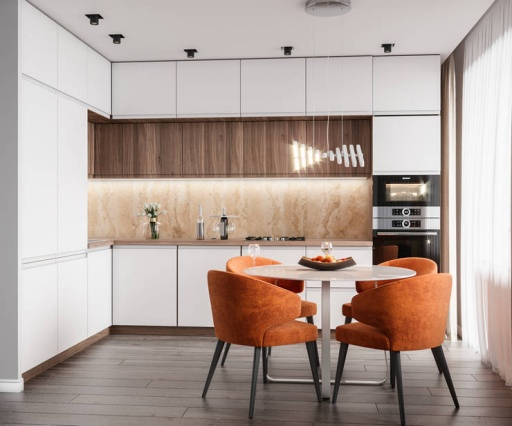

/home/leobaro/Downloads/datasets/web/datacomp/_shards_1/00000040.tar 000000400011.json
JSON Content: {
    "uid": "5f1c8cfc7faee9a4967946bd457b699a",
    "face_bboxes": [],
    "caption": "Cocinas de estilo  por CUBE INTERIOR",
    "url": "https://images.homify.com/c_fill,f_auto,q_auto,w_740/v1552569011/p/photo/image/2960127/017_2.jpg",
    "key": "000000400011",
    "status": "success",
    "error_message": null,
    "width": 512,
    "height": 426,
    "original_width": 740,
    "original_height": 616,
    "exif": "{}",
    "sha256": "5d646c84c5f4f8392b13031ed3b298152869ed8557752abf9a3a33342784cd3f"
}
/home/leobaro/Downloads/datasets/web/datacomp/_shards_1/00000040.tar 000000400011.txt
Text Content:
 Cocinas de estilo  por CUBE INTERIOR


In [77]:
# Process TAR files
for tar in tar_files:
    print(f"\nListing contents of {tar}...")
    contents = list_tar_contents(os.path.join(shards_dir, tar))
    print(contents[:10])  # Show first 10 entries
    
    # Extract and display the first image, json, and text file
    for filename in contents[:3]:
        extract_and_display_tar_contents(os.path.join(shards_dir, tar), filename)
    break


## Inspecting shards sizes

In [79]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 12.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (324 kB)


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Set plot style
sns.set(style="whitegrid")

In [84]:
# Initialize lists to store file sizes and image counts
tar_sizes = []
image_counts = []

# Loop through all .tar files to get the sizes and count image files
for tar_file in tqdm(tar_files):
    tar_file_path = os.path.join(shards_dir, tar_file)
    
    # Get the size of the tar file in MB
    tar_sizes.append(os.path.getsize(tar_file_path) / (1024 * 1024))  # Size in MB
    
    # Open and inspect the tar file
    with tarfile.open(tar_file_path, 'r') as tar:
        # Extract all file names in the tar file
        file_names = tar.getnames()
        
        # Count image files (.jpg)
        image_count = sum(1 for f in file_names if f.endswith('.jpg'))
        image_counts.append(image_count)

# Create a DataFrame to hold the results
df = pd.DataFrame({'tar_file': tar_files, 'tar_size_mb': tar_sizes, 'image_count': image_counts})

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:29<00:00,  1.74it/s]


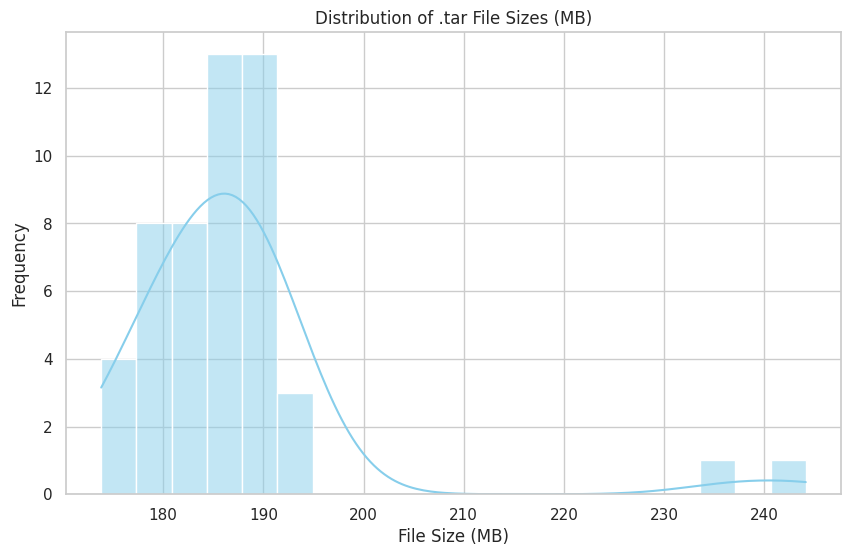

In [85]:
# Plot distribution of tar file sizes
plt.figure(figsize=(10, 6))
sns.histplot(df['tar_size_mb'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of .tar File Sizes (MB)')
plt.xlabel('File Size (MB)')
plt.ylabel('Frequency')
plt.show()


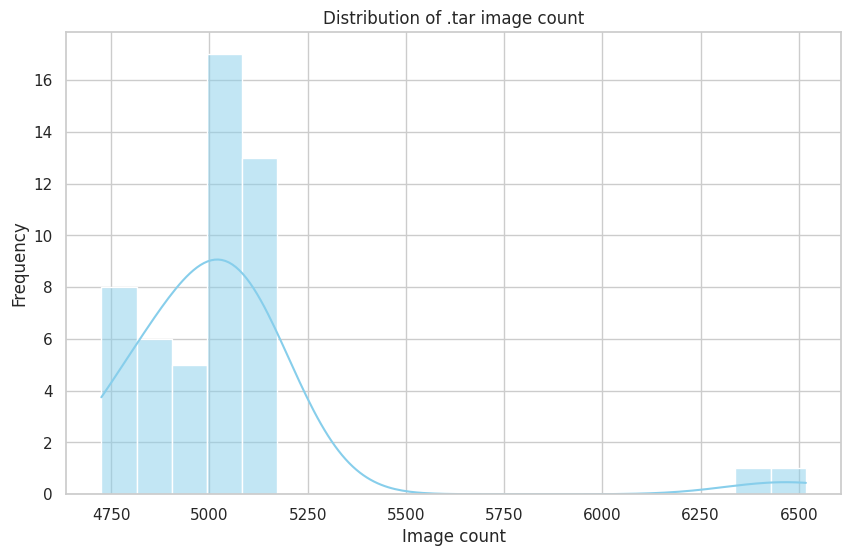

In [87]:
# Plot distribution of tar file sizes
plt.figure(figsize=(10, 6))
sns.histplot(df['image_count'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of .tar image count')
plt.xlabel('Image count')
plt.ylabel('Frequency')
plt.show()


# Total images

In [88]:
sum(df["image_count"])

257097